<a href="https://colab.research.google.com/github/nuraishasb/supervisedML/blob/main/Python_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 | Introduction

In this report, we experiment the use of machine learning operators, mainly Supervised Learning. We will be working with Regression models using the Insurance dataset, and Classification models on the Stroke dataset.

# 2 | Regression Task


### 2.1: EDA

We use exploratory data analysis (EDA) to investigate data sets and summarize their main characteristics, which can be done by employing data visualization methods.

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/insurance.csv')

Mounted at /content/drive


In [2]:
# checking for duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

# checking for NA values
df.dropna(inplace=True)
print(df.isna().sum())

df.head(n=5)

0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Data visulisation
import pandas as pd
import numpy as np # work with arrays
import scipy.stats as stats # for statistical procedures such as t-test etc.
import seaborn as sns # data visualisation library
import matplotlib.pyplot as plt

#libraries used for handling missing and non-numeric values - part of data cleaning
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Pipeline : Chains all steps of the workflow for a more streamlined procedure.
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,chi2

#Training data
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import cross_val_score # Evaluate a score by cross-validation.
from sklearn.model_selection import StratifiedShuffleSplit #Random permutation cross-validator
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator

#linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#Decision tree and SVM
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

#R2 square and mean squared error
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC


In [4]:
#convert categorical to numerical values using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
sex = df['sex'].values.reshape(-1,1) #female = 0, male = 1.
df['sex'] = ordinal_encoder.fit_transform(sex)

smoker = df['smoker'].values.reshape(-1,1) #smoker = 1, non-smoker = 0.
df['smoker'] = ordinal_encoder.fit_transform(smoker)

region = df['region'].values.reshape(-1,1) #NE = 0, NW = 1, SE = 2, SW = 3.
df['region'] = ordinal_encoder.fit_transform(region)

df.head(n=5)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


### 2.2: Predicting Cost of Insurance

In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Define the target variable and feature set
target = df['charges']
features = df.drop(columns='charges')

# Initialize and fit the feature selection
selector = SelectKBest(score_func=f_regression, k=4)
selector.fit(features, target)

# Get the support mask and feature names
supports = selector.get_support()
selected_features = features.columns[supports]

# Print the results
print("Supports:", supports)
print("All Features:", features.columns)
print("Selected Features:", list(selected_features))

features = features[selected_features]

#split the feature and target into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 13)

Supports: [ True False  True  True  True False]
All Features: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Selected Features: ['age', 'bmi', 'children', 'smoker']


In [6]:
#checking for multicollinearity
features.corr()

,age,bmi,children,smoker
age,1.000000,0.109344,0.041536,-0.025587
bmi,0.109344,1.000000,0.012755,0.003746
children,0.041536,0.012755,1.000000,0.007331
smoker,-0.025587,0.003746,0.007331,1.000000


#### 2.2.1: Linear Regression

Linear regression model is a basic and commonly used type of predictive analysis - it assumes a linear relationship between the independent variable and the dependent variable, and aims to find the best-fitting line that describes the relationship.

R2 score of the regression model is:  0.7669440382818201
RMSE score of the regression model is:  5724.944712039426


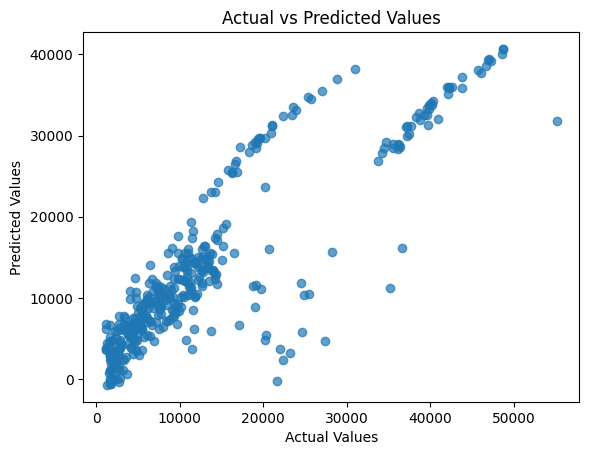

In [7]:
# simple linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

# R squared score measures the proportion of the variance in the dependent variable that is predictable from the independent variables
# higher value the better
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
r2_lr = r2_score(Y_test, predictions)

# square root of the avg squared differences b/w predicted and act values
# smaller value the better
mse_lr = mean_squared_error(Y_test, predictions)
rmse_lr = np.sqrt(mse_lr)

print('R2 score of the regression model is: ', r2_lr)
print('RMSE score of the regression model is: ', rmse_lr)

plt.scatter(Y_test, predictions, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

R2 score of the regression model with interaction effects is:  0.8690304747372666
RMSE score of the regression model with interaction effects is:  4291.669948147733


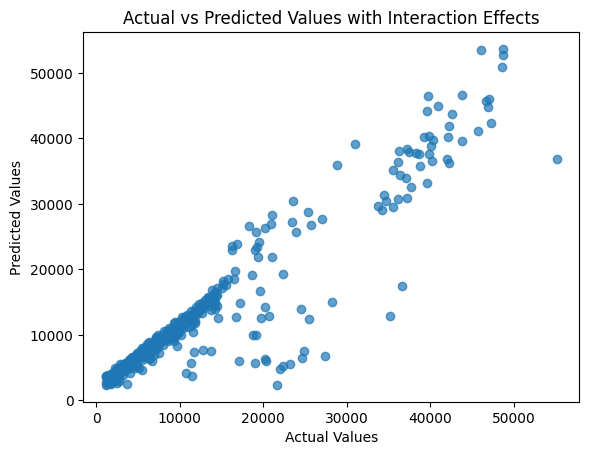

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=False, include_bias=False)
X_train_interaction = poly.fit_transform(X_train)
X_test_interaction = poly.transform(X_test)

# Train the model with interaction features
model = LinearRegression()
model.fit(X_train_interaction, Y_train)

# Make predictions
predictions = model.predict(X_test_interaction)

# Evaluate the model
r2_lrx = r2_score(Y_test, predictions)
mse_lrx = mean_squared_error(Y_test, predictions)
rmse_lrx = np.sqrt(mse_lrx)

print('R2 score of the regression model with interaction effects is: ', r2_lrx)
print('RMSE score of the regression model with interaction effects is: ', rmse_lrx)

# Plotting
plt.scatter(Y_test, predictions, alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Interaction Effects')
plt.show()



Adding interaction terms improves the R squared score to 0.869030, meaning this model explains about 86.9% of the variance in the data. This is a substantial improvement over the simple linear regression without interaction terms.

#### 2.2.2: Ridge Regression

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. We’ll use the `glmnet()` function to fit the ridge regression model and specify `alpha=0`. We will also be using the interaction effect, since it produces lesser rmse score.

In [9]:
# ridge regression
model = Ridge(alpha = 0.5)
model.fit(X_train_interaction, Y_train)


predictions = model.predict(X_test_interaction)
r2_rr = r2_score(Y_test, predictions)
mse_rr = mean_squared_error(Y_test, predictions)
rmse_rr = np.sqrt(mse_rr)

print('R2 score of the regression model is: ', r2_rr)
print('RMSE score of the regression model is: ', rmse_rr)

R2 score of the regression model is:  0.8690025698129222
RMSE score of the regression model is:  4292.127124527419


####2.2.3: Lasso Regression

Lasso regression is another model tuning method, similar to ridge, that is used to analyse data with multicollinearity present. We’ll use the `glmnet()` function as well to fit the lasso regression model but specify `alpha=1` instead.

In [10]:
# lasso regression
model = Lasso(alpha = 0.5)
model.fit(X_train_interaction, Y_train)

predictions = model.predict(X_test_interaction)
r2_la = r2_score(Y_test, predictions)
mse_la = mean_squared_error(Y_test, predictions)
rmse_la = np.sqrt(mse_la)

print('R2 score of the regression model is: ', r2_la)
print('RMSE score of the regression model is: ', rmse_la)

R2 score of the regression model is:  0.8690329688984447
RMSE score of the regression model is:  4291.629083039935


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e+10, tolerance: 1.392e+07
  model = cd_fast.enet_coordinate_descent(


### 2.3: Final Analyisis

In [11]:
# creating a report
models = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Simple Linear Regression (w Interaction)', 'Ridge Regression', 'Lasso Regression'],
    'R2 Score': [r2_lr, r2_lrx, r2_rr, r2_la],
    'RMSE Score': [rmse_lr, rmse_lrx, rmse_rr, rmse_la]})
models

,Model,R2 Score,RMSE Score
0,Simple Linear Regression,0.766944,5724.944712
1,Simple Linear Regression (w Interaction),0.869030,4291.669948
2,Ridge Regression,0.869003,4292.127125
3,Lasso Regression,0.869033,4291.629083


Adding interaction terms significantly improves the model performance. Both Ridge and Lasso regression models, which include interaction terms, perform similarly well to the Simple Linear Regression model with interaction terms. This demonstrates that regularization techniques (Ridge and Lasso) help maintain or slightly improve performance while potentially reducing overfitting.

# 3 | Classification Task


### 3.1: EDA

In [12]:
df1 = pd.read_csv('/content/drive/My Drive/stroke-data.csv')

In [13]:
# checking for duplicates
df1.drop_duplicates(inplace=True)
print(df1.duplicated().sum())

# checking for NA values
df1.dropna(inplace=True)
print(df1.isna().sum())

df1.drop(df1.columns[[0]],
              axis=1, inplace=True)

df1.head(n=5)

0
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [14]:
# convert categorical to numerical values using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
ordinal_encoder = OrdinalEncoder()
gender = df1['gender'].values.reshape(-1,1)
df1['gender'] = ordinal_encoder.fit_transform(gender)

ever_married = df1['ever_married'].values.reshape(-1,1)
df1['ever_married'] = ordinal_encoder.fit_transform(ever_married)

work_type = df1['work_type'].values.reshape(-1,1)
df1['work_type'] = ordinal_encoder.fit_transform(work_type)

Residence_type = df1['Residence_type'].values.reshape(-1,1)
df1['Residence_type'] = ordinal_encoder.fit_transform(Residence_type)

smoking_status = df1['smoking_status'].values.reshape(-1,1)
df1['smoking_status'] = ordinal_encoder.fit_transform(smoking_status)

df1.head(n=5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
2,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1
5,1.0,81.0,0,0,1.0,2.0,1.0,186.21,29.0,1.0,1


In [15]:
target = df1['heart_disease']
features = df1.loc[:, df1.columns != 'heart_disease']

selected_features = []
selector = SelectKBest(f_regression, k = 5)
selector.fit_transform(features, target)

supports = selector.get_support()

print(supports)
print(features.columns)

for support, feature in zip(supports, features.columns):

  if (support == True):
    selected_features.append(feature)

print('Selected features are: ', selected_features)

features = features[selected_features]

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size = 0.3, random_state = 31)

[False  True  True  True False False  True False False  True]
Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')
Selected features are:  ['age', 'hypertension', 'ever_married', 'avg_glucose_level', 'stroke']


In [16]:
df1.corr() #all variables are weakly correlated to heart disease, with age being the exception as it shows a moderate correlation

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


In [17]:
features.corr() #high multicollinearity exists b/w ever_married & age

,age,hypertension,ever_married,avg_glucose_level,stroke
age,1.000000,0.274425,0.680782,0.235838,0.232331
hypertension,0.274425,1.000000,0.162406,0.180543,0.142515
ever_married,0.680782,0.162406,1.000000,0.151377,0.105089
avg_glucose_level,0.235838,0.180543,0.151377,1.000000,0.138936
stroke,0.232331,0.142515,0.105089,0.138936,1.000000


### 3.2: Predicting Heart Disease

#### 3.2.1: KNN

In [18]:
#K Nearest Neighbour

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)

accuracy_KNN5 = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of KNN is ', accuracy_KNN5)


KNN = KNeighborsClassifier(n_neighbors = 12)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)

accuracy_KNN12 = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of KNN is ', accuracy_KNN12)


KNN = KNeighborsClassifier(n_neighbors = 11)
KNN.fit(X_train, Y_train)

Y_pred = KNN.predict(X_test)

accuracy_KNN11 = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of KNN is ', accuracy_KNN11)

Accuracy of KNN is  94.57
Accuracy of KNN is  95.04
Accuracy of KNN is  95.11


#### 3.2.2: Logistic Regression

In [19]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

Y_pred = LR.predict(X_test)

accuracy_LR = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of LR is ', accuracy_LR)

Accuracy of LR is  95.04


#### 3.2.3: DTC
Decision Tree Classifier helps in making decisions by splitting data into subsets based on different criteria.

Accuracy of DTC is  95.04


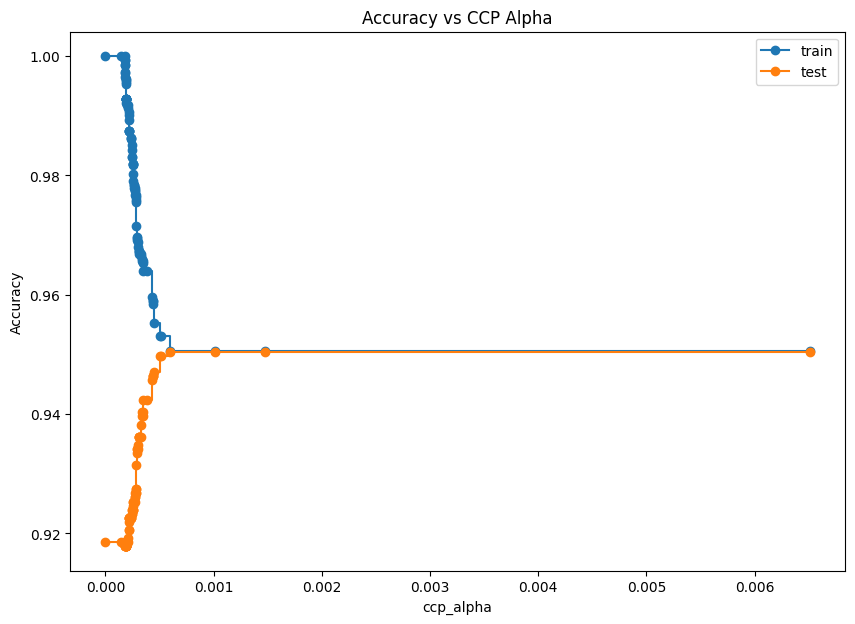

In [20]:
#Decision Tree Classifier
DTC = DecisionTreeClassifier(ccp_alpha=0.01)
DTC.fit(X_train, Y_train)

Y_pred = DTC.predict(X_test)

accuracy_DTC = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of DTC is ', accuracy_DTC)

#determine the optimal ccp_alpha
path = DTC.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#create and train a series of trees with different values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

#calculate the accuracy of each tree
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

#plot the results
plt.figure(figsize=(10, 7))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs CCP Alpha')
plt.show()


#### 3.2.4: SVM
Support Vector Machine aims to find the optimal hyperplane (line in 2D, plane in 3D, or hyperplane in higher dimensions) that maximizes the margin between two classes.

In [21]:
#Support Vector Machine
SVC = SVC()
SVC.fit(X_train, Y_train)

Y_pred = SVC.predict(X_test)

accuracy_SVC = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of SVC is ', accuracy_SVC)

Accuracy of SVC is  95.04


#### 3.2.5: Naive Bayes Classifier
Naive Bayes uses Bayes' Theorem to update the probability of a hypothesis based on new evidence. The "naive" part comes from the assumption that all features (or attributes) of the data are independent of each other given the category.

In [22]:
#Naive Bayes Classifier
Gaussian = GaussianNB()
Gaussian.fit(X_train, Y_train)

Y_pred = Gaussian.predict(X_test)

accuracy_Gaussian = round(metrics.accuracy_score(Y_test, Y_pred)*100, 2)
print('Accuracy of Gaussian is ', accuracy_Gaussian)

Accuracy of Gaussian is  87.85


### 3.3: Final Analyisis

In [23]:
#overall results
models = pd.DataFrame({
    'Model':['KNN (K=5)', 'KNN (K=12)', 'KNN (K=11)', 'Naive Bayes', 'Logistic Regression','Decision Tree Classifier', 'Support Vector Machines'],
    'Score':[accuracy_KNN5, accuracy_KNN12, accuracy_KNN11, accuracy_Gaussian, accuracy_LR, accuracy_DTC, accuracy_SVC]
})
models

,Model,Score
0,KNN (K=5),94.57
1,KNN (K=12),95.04
2,KNN (K=11),95.11
3,Naive Bayes,87.85
4,Logistic Regression,95.04
5,Decision Tree Classifier,95.04
6,Support Vector Machines,95.04


Naive Bayes has the lowest accuracy of 87.85%, which suggests that the assumptions of Naive Bayes (e.g., feature independence) may not hold well for this dataset. We can try using cross-validation to find the optimal value of K for KNN so as to avoid overfitting or underfitting. We can also experiment with different distance metrics (e.g., Manhattan, Minkowski) to see if they yield better results.